## From the article

# Implementing a distance-based classifier with a quantum interference circuit

###  M. Schuld et al 2017 EPL 119 60002

## Let's get the most we can from this

# Preparing the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("Iris/iris.data",header=None,names=["f0","f1","f2","f3","class"])

In [3]:
setosa = iris[iris["class"] == "Iris-setosa"]
versicolor = iris[iris["class"] == "Iris-versicolor"]
virginica = iris[iris["class"] == "Iris-virginica"]

In [4]:
data = pd.concat([setosa,versicolor,virginica])

In [5]:
import matplotlib.pyplot as plt

lw = 1

def prePlotIris(data,x,y):
    X = data[data["class"] == "Iris-setosa"]
    plt.scatter(X[x],X[y],color="red",marker="o",edgecolor='black', linewidth=lw,label="setosa")
    X = data[data["class"] == "Iris-versicolor"]
    plt.scatter(X[x],X[y],color="blue",marker="o",edgecolor='black', linewidth=lw,label="versicolor")
    X = data[data["class"] == "Iris-virginica"]
    plt.scatter(X[x],X[y],color="yellow",marker="o",edgecolor='black', linewidth=lw,label="virginica")
    
    plt.xlabel('sepal length in cm')
    plt.ylabel('sepal width in cm')
    plt.legend(loc='upper left')
    
#     plt.xlim([0,8])
#     plt.ylim([0,4.5])
    
def plotIris(data,x,y):
    prePlotIris(data,x,y)
    plt.show()

def saveIris(data,x,y,saveName):
    prePlotIris(data,x,y)
    plt.savefig('images/'+saveName, dpi=300)

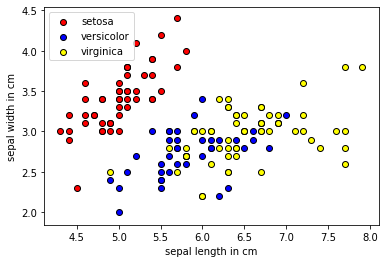

In [6]:
plotIris(data,"f0","f1")

In [7]:
# saveIris(data,"f0","f1","iris4features.png")

In [8]:
data.loc[:,["f0","f1","f2","f3"]].describe()

,f0,f1,f2,f3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:,["f0","f1","f2","f3"]] = scaler.fit_transform(data.loc[:,["f0","f1","f2","f3"]])

In [10]:
data.loc[:,["f0","f1","f2","f3"]].describe()

,f0,f1,f2,f3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


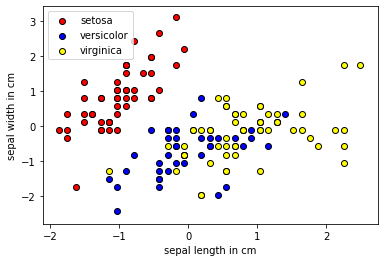

In [11]:
plotIris(data,"f0","f1")

In [12]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [13]:
for i in data.index:
    v = [data["f0"][i],data["f1"][i],data["f2"][i],data["f3"][i]]
    v = normalize(v)
    data.loc[i,"f0"], data.loc[i,"f1"], data.loc[i,"f2"], data.loc[i,"f3"] = v[0], v[1], v[2], v[3]

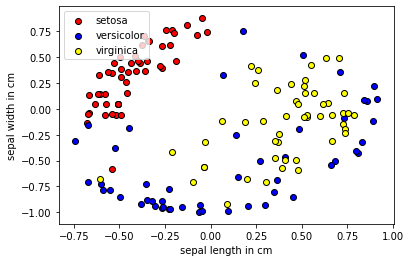

In [14]:
plotIris(data,"f0","f1")

In [15]:
# saveIris(data,"f0","f1","iris4normalized.png")

In [16]:
setosa = data[data["class"]=="Iris-setosa"]
versicolor = data[data["class"]=="Iris-versicolor"]
virginica = data[data["class"]=="Iris-virginica"]

In [17]:
# Primi vettori dagli insiemi
# T0 = setosa.iloc[0:10].copy()
# T0.loc[:,"f0":"f3"] = T0.loc[:,"f0":"f3"].apply(np.arcsin)
# T1 = versicolor.iloc[0:11].copy()
# T1.loc[:,"f0":"f3"] = T1.loc[:,"f0":"f3"].apply(np.arcsin)
# T2 = virginica.iloc[0:11].copy()
# T2.loc[:,"f0":"f3"] = T2.loc[:,"f0":"f3"].apply(np.arcsin)

In [18]:
# random_seed : int : Random number generator seed
random_seed = 1
rgen = np.random.RandomState(random_seed)
def _shuffle(self, X, y):
    """Shuffle training data"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

In [19]:
# Vettori presi casualmente
# Prima si crea gli array randomici completi, 
# poi li dividiamo in vettori di training ed un vettore da classificare
randomSetosa = setosa.iloc[rgen.permutation(len(setosa.index))].copy()
randomVersicolor = versicolor.iloc[rgen.permutation(len(versicolor.index))].copy()
randomVirginica = virginica.iloc[rgen.permutation(len(virginica.index))].copy()
# Applica la funzione arcoseno
randomSetosa.loc[:,"f0":"f3"] = randomSetosa.loc[:,"f0":"f3"].apply(np.arcsin)
randomVersicolor.loc[:,"f0":"f3"] = randomVersicolor.loc[:,"f0":"f3"].apply(np.arcsin)
randomVirginica.loc[:,"f0":"f3"] = randomVirginica.loc[:,"f0":"f3"].apply(np.arcsin)
# Prendi i primi n vettori per il training
trainingSetosa = randomSetosa.iloc[:2]
trainingVersicolor = randomVersicolor.iloc[:3]
trainingVirginica = randomVirginica.iloc[:3]
# Prendi il vettore successivo per l'input
# Essendo gli insiemi casuali, anche questo è casuale, 
# ma non appartiene all'insieme di training
inputSetosa = randomSetosa.iloc[2]
inputVersicolor = randomVersicolor.iloc[3]
inputVirginica = randomVirginica.iloc[3]
# S0 = setosa.iloc[rgen.permutation(len(setosa.index))[:10]].copy()
# S0.loc[:,"f0":"f3"] = S0.loc[:,"f0":"f3"].apply(np.arcsin)
# S1 = versicolor.iloc[rgen.permutation(len(versicolor.index))[:11]].copy()
# S1.loc[:,"f0":"f3"] = S1.loc[:,"f0":"f3"].apply(np.arcsin)
# S2 = virginica.iloc[rgen.permutation(len(virginica.index))[:11]].copy()
# S2.loc[:,"f0":"f3"] = S2.loc[:,"f0":"f3"].apply(np.arcsin)

In [20]:
randomSetosa.head()

,f0,f1,f2,f3,class
27,-0.354374,0.477346,-0.608647,-0.624234,Iris-setosa
35,-0.474640,0.151683,-0.708566,-0.627626,Iris-setosa
40,-0.452604,0.457467,-0.641434,-0.530117,Iris-setosa
38,-0.738251,-0.048105,-0.568100,-0.529683,Iris-setosa
2,-0.618297,0.141835,-0.624878,-0.581605,Iris-setosa


In [21]:
trainingSetosa

,f0,f1,f2,f3,class
27,-0.354374,0.477346,-0.608647,-0.624234,Iris-setosa
35,-0.474640,0.151683,-0.708566,-0.627626,Iris-setosa


In [22]:
inputSetosa

f0         -0.452604
f1          0.457467
f2         -0.641434
f3         -0.530117
class    Iris-setosa
Name: 40, dtype: object

In [23]:
# Se = setosa.loc[:,"f0":"f3"].apply(np.arcsin)
# Ve = versicolor.loc[:,"f0":"f3"].apply(np.arcsin)
# Vi = virginica.loc[:,"f0":"f3"].apply(np.arcsin)

In [24]:
# Il training array completo è composto da elementi per ogni classe
trainingArray = pd.concat([trainingSetosa,trainingVersicolor,trainingVirginica])
# trainingArray.tail()

In [25]:
# Per 32 elementi servono 
len(trainingArray.index)

8

# Building the quantum circuit

To store 4 features I need 2 $i$ qubits.  
To store 3 classes I need 2 $c$ quibits.  
To store 6 training vectors I need 3 $m$ qubits.  
I need some ancilla qubits for the QRAM routine.  
I need one more bit to store the conditional measurement on the rotation qubit. 

In [26]:
import qiskit
from qiskit import IBMQ
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram
# import qiskit.aqua.circuits.gates.controlled_ry_gates

In [27]:
# terra-version
qiskit.__version__

'0.9.0'

In [28]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [29]:
provider = IBMQ.load_account()

In [30]:
print("Available backends:")
provider.backends()

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
def encodeVector(circuit,data,i,controls,rotationQubit,ancillaQubits):
    # |00>
    circuit.x(i)
    circuit.mcry(data[0],controls,rotationQubit,ancillaQubits)
    circuit.x(i)
    
    # |01>
    circuit.x(i[1])
    circuit.mcry(data[1],controls,rotationQubit,ancillaQubits)
    circuit.x(i[1])
    
    # |10>
    circuit.x(i[0])
    circuit.mcry(data[2],controls,rotationQubit,ancillaQubits)
    circuit.x(i[0])
    
    # |11>
    circuit.mcry(data[3],controls,rotationQubit,ancillaQubits)

In [32]:
def encodeClass(circuit,irisClass):
    classSwitcher = {
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica": 2
    }
    
    if classSwitcher.get(irisClass) == 0:
        circuit.x(c)
    elif classSwitcher.get(irisClass) == 1:
        circuit.x(c[1])
    elif classSwitcher.get(irisClass) == 2:
        circuit.x(c[0])

In [33]:
def encodeIndexBitwise3(circuit,index):
    """
    Encode the index of the training vectors with reason
    """
    
    zerosInIndex = index ^ 0b111
    
    if zerosInIndex & 0b001:
        circuit.x(m[0])
    if zerosInIndex & 0b010:
        circuit.x(m[1])
    if zerosInIndex & 0b100:
        circuit.x(m[2])

In [35]:
def encodeIndexBitwise(circuit,index):
    """
    Encode the index of the training vectors with reason
    """
    
    zerosInIndex = index ^ 0b1111111
    
    if zerosInIndex & 0b0000001 & len(m) >= 1:
        circuit.x(m[0])
    if zerosInIndex & 0b0000010 & len(m) >= 2:
        circuit.x(m[1])
    if zerosInIndex & 0b0000100 & len(m) >= 3:
        circuit.x(m[2])
    if zerosInIndex & 0b0001000 & len(m) >= 4:
        circuit.x(m[3])
    if zerosInIndex & 0b0010000 & len(m) >= 5:
        circuit.x(m[4])
    if zerosInIndex & 0b0100000 & len(m) >= 6:
        circuit.x(m[5])
    if zerosInIndex & 0b1000000 & len(m) >= 7:
        circuit.x(m[6])

In [36]:
format(2, '04b')

'0010'

In [37]:
def encodeTraining(circuit,data,i,controls,rotationQubit,ancillaQubits,c,m):
    # Header
    encodeClass(circuit,c)
    encodeIndexBitwise(circuit,m)
    
    # Encoder
    encodeVector(circuit,data,i,controls,rotationQubit,ancillaQubits)
    
    # Footer
    encodeClass(circuit,c)
    encodeIndexBitwise(circuit,m)

In [38]:
def buildTrainingState(trainingArray):
    """
    Given an array of up to 32 training vectors,
    build the quantum superposition state. 
    """
    for index in range(len(trainingArray.index)):
        trainingVector = trainingArray.iloc[index]
        encodeTraining(circuit,trainingVector["f0":"f3"],i,a[:]+i[:]+m[:]+c[:],r[0],q,trainingVector["class"],index)

In [39]:
N_a = 1
N_m = 2
N_i = 2
N_r = 1
N_q = 5
N_c = 2
N_a + N_m + N_i + N_r + N_q + N_c

13

In [40]:
a = QuantumRegister(1,'a') # knn ancilla
m = QuantumRegister(2,'m') # training vector index
i = QuantumRegister(2,'i') # feature index
r = QuantumRegister(1,'r') # rotation qubit
q = QuantumRegister(5,'q') # qram ancilla
c = QuantumRegister(2,'c') # class
b = ClassicalRegister(4, 'bit')
circuit = QuantumCircuit(a,m,i,r,q,c,b)

circuit.h(a)
circuit.h(m)
circuit.h(i)
circuit.h(c)

# circuit.cry(theta, control, target)
# circuit.mcry(theta, controls, target, ancillae)

# >>> Encode the input vector >>>

encodeVector(circuit,inputSetosa,i,a[:]+i[:],r[0],q)

circuit.x(a)

# <<< Encode the input vector <<<

# >>> Encode the training vectors >>>

buildTrainingState(trainingArray)

# <<< Encode the training vectors <<<

circuit.measure(r,b[0])

circuit.h(a)

circuit.measure(a,b[1])
circuit.measure(c[0],b[2])
circuit.measure(c[1],b[3])

# circuit.draw(output='mpl')

In [49]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=8192)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)
# plot_histogram(counts)


Total counts are: {'1011': 108, '0100': 1923, '0000': 1916, '0010': 5, '1001': 31, '1110': 1, '1100': 2038, '0111': 93, '1111': 20, '1101': 42, '0001': 92, '0110': 5, '0011': 29, '1000': 1843, '0101': 39, '1010': 7}


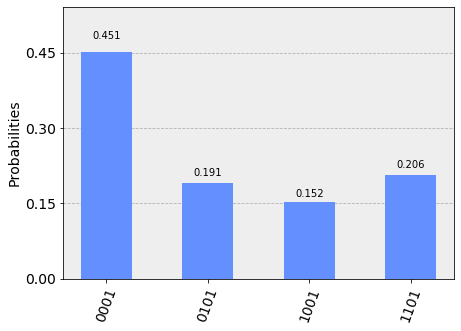

In [50]:
goodCounts = {k: counts[k] for k in counts.keys() & {'0001','0101','1001','1101'}}
plot_histogram(goodCounts)#.savefig('images/multiclass_virginica.png', dpi=300)

## Online simulator

In [32]:
backend_hpc = provider.get_backend('ibmq_qasm_simulator', hub=None)

In [45]:
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192

# Maximum number of credits to spend on executions.
max_credits = 3

job_hpc = execute(circuit, backend_hpc, shots=shots, max_credits=max_credits)

In [46]:
result_hpc = job_hpc.result()

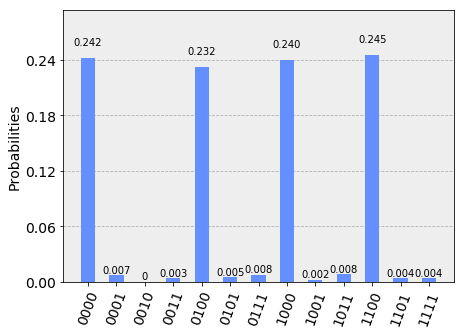

In [47]:
counts_hpc = result_hpc.get_counts(circuit)
plot_histogram(counts_hpc)

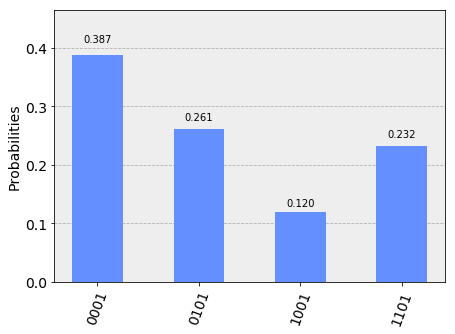

In [48]:
goodCounts_hpc = {k: counts_hpc[k] for k in counts_hpc.keys() & {'0001', '0101', '1001', '1101'}}
plot_histogram(goodCounts_hpc)

## Real hardware
Vedi https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/fundamentals/3_the_ibmq_account.ipynb

In [52]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 13 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


In [53]:
print(backend, backend.status().pending_jobs)

ibmq_16_melbourne 40


In [54]:
backend.configuration()

QasmBackendConfiguration(allow_q_circuit=False, allow_q_object=True, backend_name='ibmq_16_melbourne', backend_version='1.0.0', basis_gates=['u1', 'u2', 'u3', 'cx', 'id'], conditional=False, coupling_map=[[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]], credits_required=True, description='14 qubit device', gates=[GateConfig(coupling_map=[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13]], name='id', parameters=[], qasm_def='gate id q { U(0,0,0) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13]], name='u1', parameters=['lambda'], qasm_def='gate u1(lambda) q { U(0,0,lambda) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13]], name='u2', parameters=['phi', 'lambda'], qasm_def='gate u2(phi,lambda) q { U(pi/2,phi,lambda) q; }'), GateConfig(coupling_map=[

In [59]:
from qiskit.tools.monitor import job_monitor
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192
# Maximum number of credits to spend on executions.
max_credits = 5

job_exp = execute(circuit, backend, shots=shots, max_credits=max_credits)

In [60]:
job_exp.status()

<JobStatus.VALIDATING: 'job is being validated'>

In [61]:
job_exp.queue_position()

In [ ]:
job_monitor(job_exp)

Job Status: job is queued (27)    

In [ ]:
result_exp = job_exp.result()

In [ ]:
counts_exp = result_exp.get_counts(circuit)

In [ ]:
print(counts_exp)

In [ ]:
goodCounts_exp = {k: counts_exp[k] for k in counts_exp.keys() & {'0001', '0101', '1001', '1101'}}

In [ ]:
plot_histogram(goodCounts_exp)

In [55]:
# Vedi gli ultimi ordini di esecuzione
for ran_job in backend.jobs(limit=5):
    print(str(ran_job.job_id()) + " " + str(ran_job.status()))

5d720c45e85f9900118515a1 JobStatus.CANCELLED
5d718fe6b2eb4a0012fc59a1 JobStatus.DONE
5d5d0a14600e30001904615c JobStatus.DONE
5d54b04bc69f2c0018cc5da8 JobStatus.DONE
5d40bad079d2c1001849f5ac JobStatus.DONE


In [56]:
# Riprendi un determinato ordine usando il suo id
job = backend.retrieve_job(ran_job.job_id())

In [58]:
job.job_id()

'5d40bad079d2c1001849f5ac'

# Simulazione online con vettori casuali

In [41]:
backend_hpc = provider.get_backend('ibmq_qasm_simulator', hub=None)

In [43]:
# 7 |m> qubits case --> 128 training vectors
n_setosa = 42
n_versicolor = 43
n_virginica = 43
n_setosa + n_versicolor + n_virginica

128

In [44]:
randomSetosa = setosa.iloc[rgen.permutation(len(setosa.index))].copy()
randomVersicolor = versicolor.iloc[rgen.permutation(len(versicolor.index))].copy()
randomVirginica = virginica.iloc[rgen.permutation(len(virginica.index))].copy()
randomSetosa.loc[:,"f0":"f3"] = randomSetosa.loc[:,"f0":"f3"].apply(np.arcsin)
randomVersicolor.loc[:,"f0":"f3"] = randomVersicolor.loc[:,"f0":"f3"].apply(np.arcsin)
randomVirginica.loc[:,"f0":"f3"] = randomVirginica.loc[:,"f0":"f3"].apply(np.arcsin)
trainingSetosa = randomSetosa.iloc[:n_setosa]
trainingVersicolor = randomVersicolor.iloc[:n_versicolor]
trainingVirginica = randomVirginica.iloc[:n_virginica]
inputSetosa = randomSetosa.iloc[n_setosa]
inputVersicolor = randomVersicolor.iloc[n_versicolor]
inputVirginica = randomVirginica.iloc[n_virginica]
trainingArray = pd.concat([trainingSetosa,trainingVersicolor,trainingVirginica])

In [50]:
1+7+2+1+10+2

23

In [48]:
a = QuantumRegister(1,'a') # knn ancilla
m = QuantumRegister(7,'m') # training vector index
i = QuantumRegister(2,'i') # feature index
r = QuantumRegister(1,'r') # rotation qubit
q = QuantumRegister(10,'q') # qram ancilla
c = QuantumRegister(2,'c') # class
b = ClassicalRegister(4, 'bit')
circuit = QuantumCircuit(a,m,i,r,q,c,b)

circuit.h(a)
circuit.h(m)
circuit.h(i)
circuit.h(c)

# circuit.cry(theta, control, target)
# circuit.mcry(theta, controls, target, ancillae)

# >>> Encode the input vector >>>

encodeVector(circuit,inputVersicolor,i,a[:]+i[:],r[0],q)

circuit.x(a)

# <<< Encode the input vector <<<

# >>> Encode the training vectors >>>

buildTrainingState(trainingArray)

# <<< Encode the training vectors <<<

circuit.measure(r,b[0])

circuit.h(a)

circuit.measure(a,b[1])
circuit.measure(c[0],b[2])
circuit.measure(c[1],b[3])

# circuit.draw(output='mpl')

In [49]:
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192

# Maximum number of credits to spend on executions.
max_credits = 3

job_hpc = execute(circuit, backend_hpc, shots=shots, max_credits=max_credits)

result_hpc = job_hpc.result()
counts_hpc = result_hpc.get_counts(circuit)
# plot_histogram(counts_hpc)

KeyboardInterrupt: 

In [1]:
goodCounts_hpc = {k: counts_hpc[k] for k in counts_hpc.keys() & {'0001', '0101', '1001', '1101'}}
plot_histogram(goodCounts_hpc)

NameError: name 'counts_hpc' is not defined